<a href="https://colab.research.google.com/github/WidyaIn/MACHINE_LEARNING-SEM-5/blob/main/modul07_tugas_praktikum_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas**
Buatlah sebuah model K-Means dengan ketentuan,
1. Gunakan data 'Mall_Customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3. Buatlah model K-Means dengan mempertimbangkan jumlah  yang terbaik.
4. Buatlah  implementasi model SOM untuk segmentasi citra lain

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Nomor 1 - Menggunakan Data Mall_Customers.csv**

##### **Import Data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### **Data Preparation**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##### **Eksplorasi Dataset**

In [5]:
df.corr()

<ipython-input-5-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [6]:
# Cek kolom null
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

##### **Encoding Fitur 'Gender'**

In [7]:
from sklearn.calibration import LabelEncoder

le = LabelEncoder() # membuat objek dari LabelEncoder
df['Gender'] = le.fit_transform(df['Gender']) # proses encoding

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## **Nomor 2 - Clustering Fitur (minimal 2)**

##### **Pemilihan Fitur**

In [8]:
X = df[["Annual Income (k$)","Spending Score (1-100)"]]

In [9]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


##### **Data Visualization**

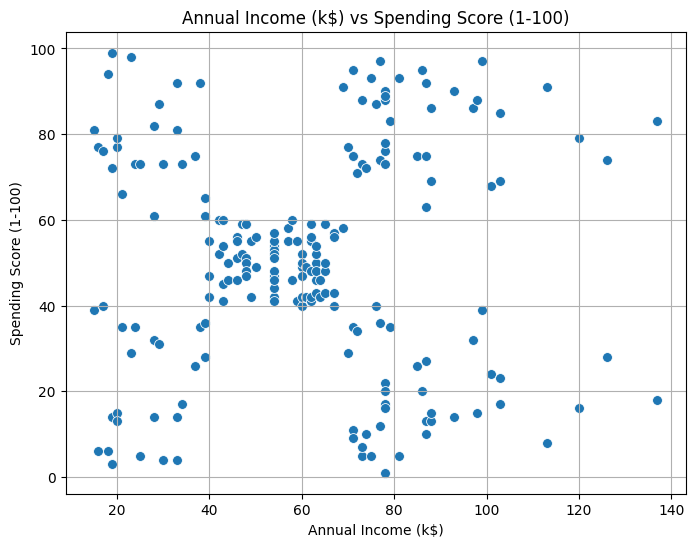

In [10]:
# Plot data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=X, s=50)
plt.title("Annual Income (k$) vs Spending Score (1-100)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.grid(True)
plt.show()

## **3. Membuat Model K-Means dengan Mempertimbangkan Jumlah k Terbaik**

In [11]:
from sklearn.cluster import KMeans

# Inisiasi obJek KMeans
cl_kmeans = KMeans(n_clusters=11)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 17508.97057740007


##### **Implementasi Metode Elbow**

In [13]:
# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,11)

# Cek nilai SSE setiap k
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    sse.append(kmeanModel.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

##### **Data Visualization**

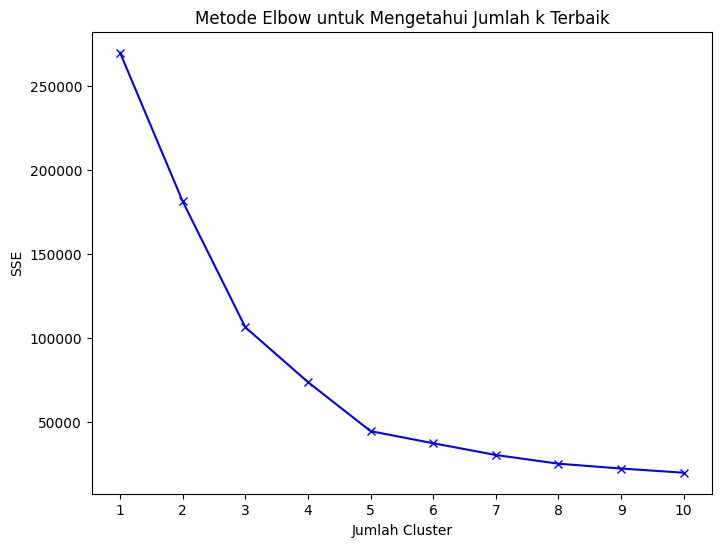

In [14]:
# Plot grafik Elbow
plt.figure(figsize=(8, 6))
plt.plot(K, sse, 'bx-')  # 'bx-' menggambarkan garis biru dengan tanda 'x' pada setiap titik
plt.title('Metode Elbow untuk Mengetahui Jumlah k Terbaik')
plt.xlabel('Jumlah Cluster')
plt.ylabel('SSE')

# Menampilkan semua angka dari 1 hingga 10 pada sumbu X
plt.xticks(K)
plt.show()

In [15]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=269981.28
k=2; SSE=181363.59595959593
k=3; SSE=106348.37306211122
k=4; SSE=73679.78903948836
k=5; SSE=44448.4554479337
k=6; SSE=37233.814510710006
k=7; SSE=30227.606513152008
k=8; SSE=25044.967764018933
k=9; SSE=22155.149490364704
k=10; SSE=19664.68519600554


Melalui grafik yang dihasilkan dengan metode elbow, diketahui bahwa sumbu x adalah jumlah kluster, sedangkan sumbu y adalah nilai kesalahan SSE (Sum of Squared Errors). Terlihat bahwa ketika jumlah kluster mencapai 5, nilai SSE tiba-tiba tidak mengalami penurunan, dan terlihat bahwa setelah titik 5 penurunan kesalahan SSE paling kecil. Oleh karena itu, diambil jumlah kluster 5 sebagai jumlah kluster yang paling sesuai untuk analisis klaster.

##### **Melakukan Klasterisasi dengan 5 Kluster**

In [16]:
# Inisiasi model K-Means dengan 5 klaster
kmeans = KMeans(n_clusters=5)

# Melakukan fitting (pelatihan) model K-Means dengan data 'X'
kmeans.fit(X)

# Memprediksi label klaster untuk setiap titik data dalam 'X'
y_kmeans = kmeans.predict(X)

# Menambahkan label klaster ke dalam dataframe 'df' sebagai kolom baru
df["label"] = y_kmeans

# Dataframe baru dengan hasil klasterisasi selesai
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,1,19,15,39,2
1,2,1,21,15,81,4
2,3,0,20,16,6,2
3,4,0,23,16,77,4
4,5,0,31,17,40,2


##### **Data Visualization**

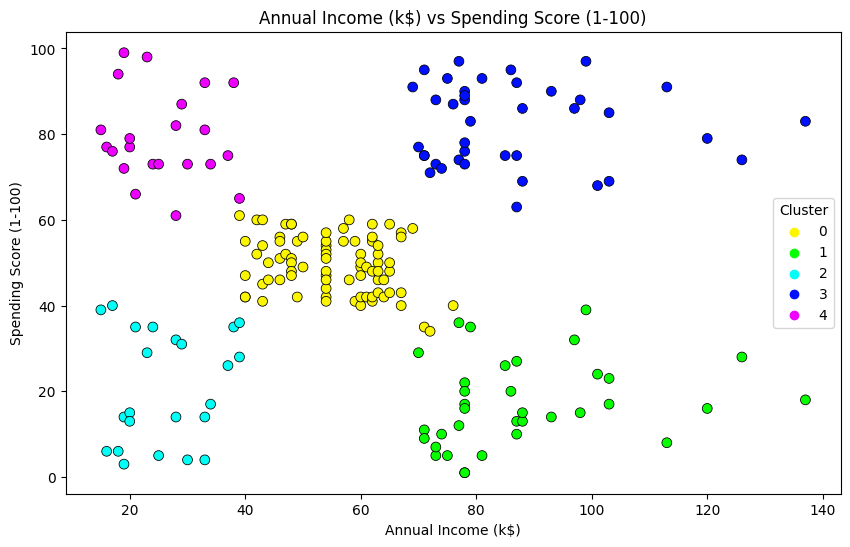

In [17]:
# Scatter plot with consistent color palette
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='label', data=df, palette=sns.color_palette("hsv", n_colors=5), s=50, edgecolor='k')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income (k$) vs Spending Score (1-100)')
plt.legend(title='Cluster', loc='center right')
plt.show()

Dari data Mall_Customers, terdapat 5 cluster yang berbeda. Cluster berwarna hijau mencakup pelanggan yang memiliki pendapatan (annual income) dan nilai pengeluaran (spending score) paling rendah, sementara cluster berwarna kuning mencakup pelanggan dengan pendapatan (annual income) dan nilai pengeluaran (spending score) tertinggi.

## **4. Implementasi Model SOM untuk Segmentasi Citra Lain**

In [18]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10588 sha256=888f28132f9231d6b9805ed3f3ee1baa8be9c77eebdd452d7ec2daec2bfff821
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [20]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

In [21]:
# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

In [22]:
# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

In [23]:
# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

In [24]:
# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

In [26]:
# Load citra
bunga_path = "/content/drive/MyDrive/Images/bunga.jpeg"
bunga = io.imread(bunga_path) / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]

(-0.5, 1279.5, 719.5, -0.5)

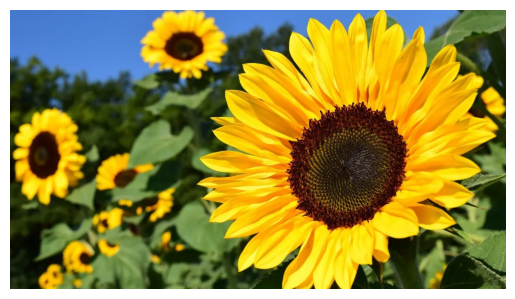

In [27]:
plt.imshow(bunga)
plt.axis('off')

In [ ]:
# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(bunga, num_epochs, initial_learning_rate, initial_neighborhood_radius)

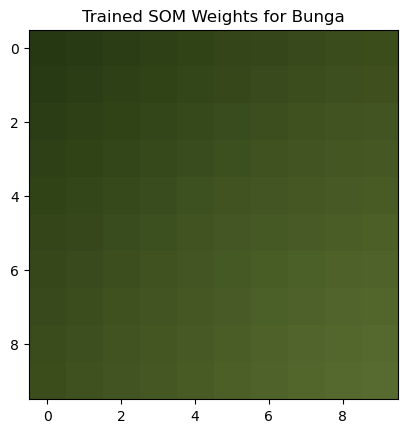

In [ ]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Bunga')
plt.show()